In [4]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 -V

Python 3.11.2


In [42]:
import numpy as np

# Graphic tools
import matplotlib.pyplot as plt
from toolbox.plot_utils import vector2d

# Utils
from toolbox.math_utils import M_rot
from scalar_field.sigma_common import sigma
from scalar_field.sigma_funcs import sigma_gauss, sigma_nonconvex, sigma_fract

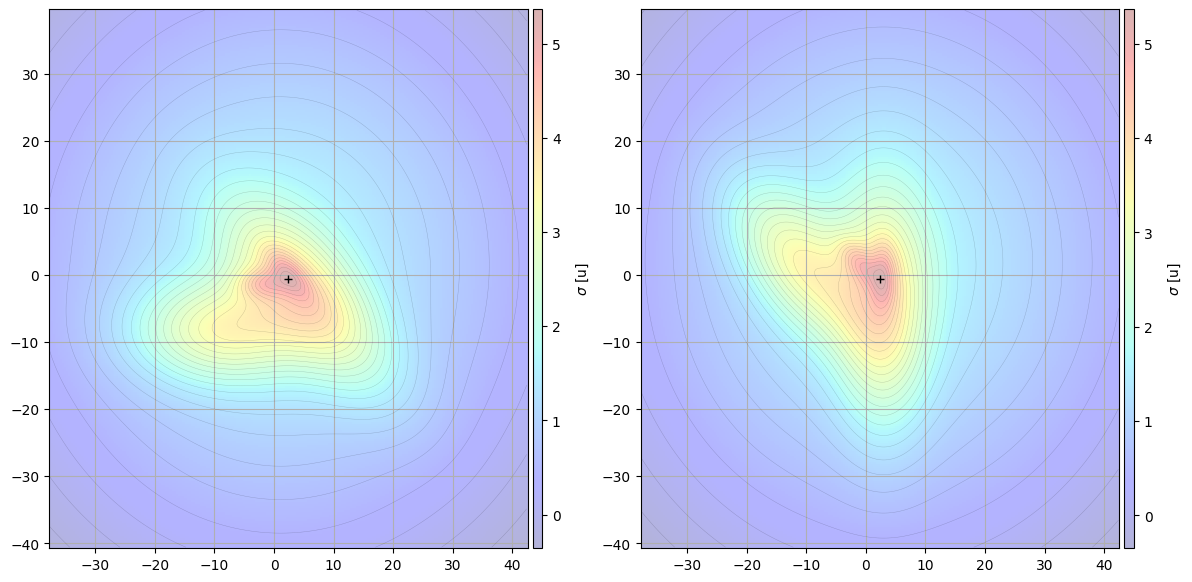

In [5]:
# ----------------------------------------------------------------------
# Testing a non-convex field with one source (sigma_fract)
# ----------------------------------------------------------------------

psi1 = 45 * np.pi / 180
psi2 = 90 * np.pi / 180

# Generate the scalar field
R1 = M_rot(psi1)
R2 = M_rot(psi2)

sigma_func = sigma_fract(k=0.04, dev=[7,2], mu=[0,0])
sigma_test = sigma(sigma_func, R=R1)

# Generate the plot
fig = plt.figure(figsize=(7*2, 7), dpi=100)
(ax1, ax2) = fig.subplots(1,2)

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax1, xlim=40, ylim=40, contour_levels=30)

sigma_test.R = R2
sigma_test.draw(fig=fig, ax=ax2, xlim=40, ylim=40, contour_levels=30)

ax1.grid(True)
ax2.grid(True)
plt.show()

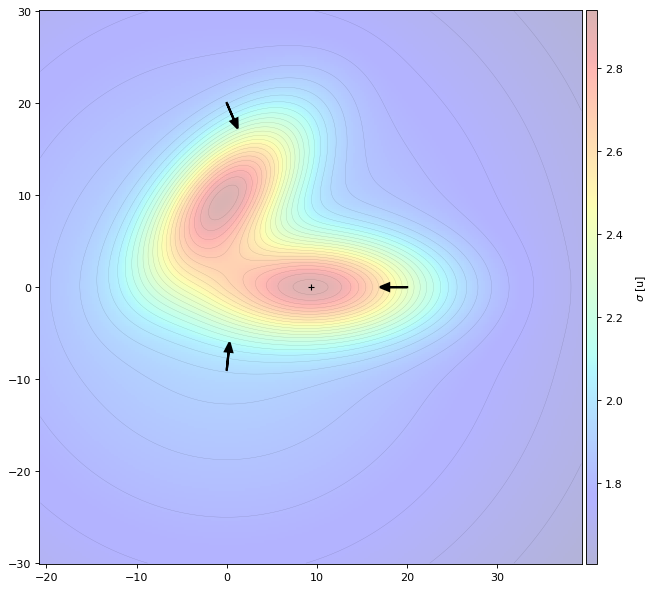

In [6]:
# ----------------------------------------------------------------------
# Testing a non-convex field with two sources (sigma_nonconvex)
# ----------------------------------------------------------------------

# Generate the scalar field
sigma_func = sigma_nonconvex(k=0.04, dev=5, a=[2,0], b=[0,2])
sigma_test = sigma(sigma_func)

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=30, ylim=30, contour_levels=30)
#sigma_test.draw_imshow(fig, ax)

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0, 20], ax, kw_arr)
sigma_test.draw_grad([20, 0], ax, kw_arr)
sigma_test.draw_grad([0,-9], ax, kw_arr)

plt.show()

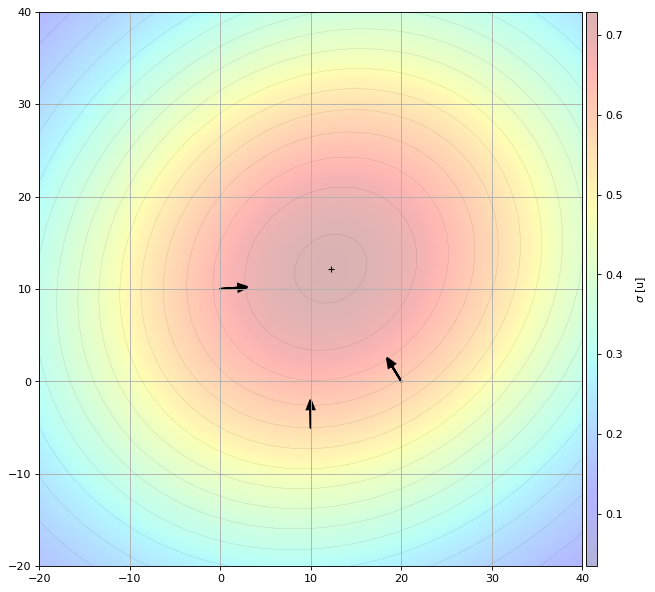

In [7]:
# ----------------------------------------------------------------------
# Testing the gaussian field
# ----------------------------------------------------------------------

max_int = 100
mu = np.array([10,10]) + 6 * (np.random.rand() - 0.5)
dev = 30 * (np.random.rand() + 1)

psi = np.pi * np.random.rand()
a, b = 1 + 3*(np.random.rand()+1), 1 + 3*(np.random.rand()+1)

# Generate the scalar field
S = -np.array([[a,0],[0,b]])
R =  M_rot(psi)
R2 = M_rot(psi)

sigma_func = sigma_gauss(mu=mu, max_intensity=max_int, dev=dev, S=S, R=R)
sigma_test = sigma(sigma_func, R=R2)

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=80)
ax = fig.subplots()

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=20)
ax.set_xlim([-20,40])
ax.set_ylim([-20,40])

# Draw multiple gradients
kw_arr = {"s":3, "lw":2, "hw":0.8, "hl":1}
sigma_test.draw_grad([0,10], ax, kw_arr)
sigma_test.draw_grad([20,0], ax, kw_arr)
sigma_test.draw_grad([10,-5], ax, kw_arr)

ax.grid(True)
plt.show()

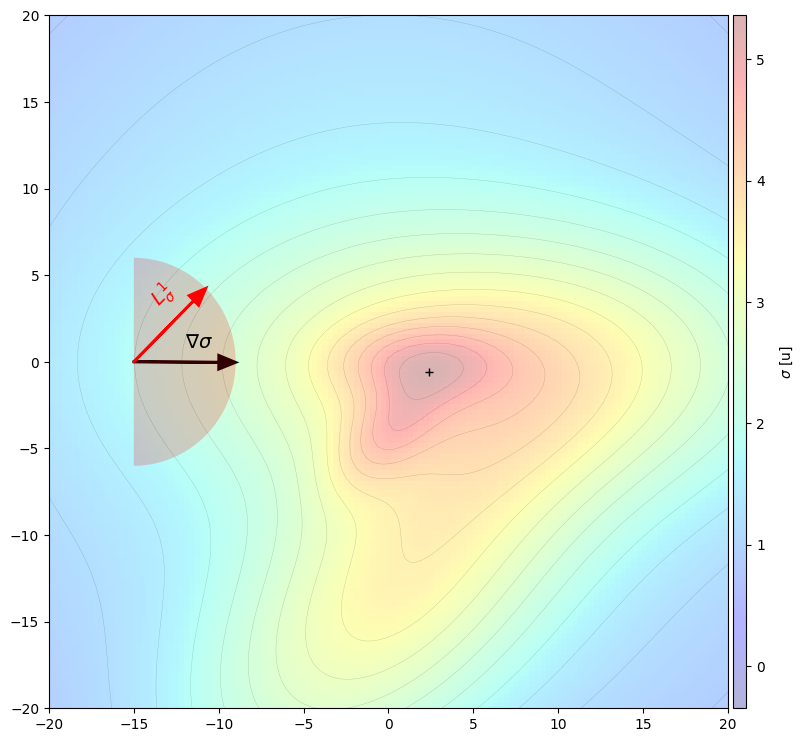

In [43]:
# ----------------------------------------------------------------------
# Figure to compare the actual gradient with L^1
# ----------------------------------------------------------------------

xy_arr = [-15,0]
r_arc = 6

psi = 0 * np.pi / 180

# Generate the scalar field
R2 = M_rot(psi)

sigma_func = sigma_fract(k=0.04, dev=[7,2], mu=[0,0])
sigma_test = sigma(sigma_func, R=R2)

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=100)
ax = fig.subplots()
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])

# Draw the scalar field
sigma_test.draw(fig=fig, ax=ax, xlim=40, ylim=40, contour_levels=20)

# Draw multiple gradients
kw_arr = {"s":r_arc, "lw":2, "hw":0.8, "hl":1}

arr_quiv = sigma_test.draw_grad(xy_arr, ax, kw_arr, ret_arr=False)
vector2d(ax, xy_arr, [np.cos(np.pi/4), np.sin(np.pi/4)], **kw_arr, c="red")

# Draw the blue shape
t_i = np.arctan2((arr_quiv[1]-xy_arr[1]), (arr_quiv[0]-xy_arr[0]))-np.pi/2
t = np.linspace(t_i, t_i+np.pi, 200)
xr, yr = xy_arr[0] + r_arc*np.cos(t), xy_arr[1] + r_arc*np.sin(t)
ax.fill(xr, yr, c="red", alpha=0.2, lw=0)

# Text
ax.text(xy_arr[0]+3, xy_arr[1]+0.8, r"$\nabla\sigma$", fontsize=14, rotation=0)
ax.text(xy_arr[0]+0.7, xy_arr[1]+3.3, r"$L_\sigma^1$", fontsize=14, rotation=180/4, color="red")

plt.show()